# TINKING

## 奇异值分解SVD的原理是怎样的，都有哪些应用场景(能简单说明奇异值分解的原理;举例说明两个以上的使用场景)

奇异值分解svd是根据非零方阵性质任何矩阵都可以分解为特征值对角矩阵与一对正交矩阵相左乘和右乘，而对于任何m*n奇异矩阵，可以让它右乘或左乘自己的转置得到一个方阵来完成特征值的计算，从而奇异矩阵分解
在计算机系统中svd可以用于图片压缩和推荐系统中通过对用户数据评分预测来补全用户没有评分的item，然后通过对指定用户的item评分排序，获取前n个实现推荐

## funkSVD, BiasSVD，SVD++算法之间的区别是怎样的 (能简述3种算法之间的差异)

funksvd是对svd算法的一种改进，它是通过梯度下降法寻找矩阵中指定的k个特征，并且使得这k个特征的损失最小，然后通过这k个特征对矩阵来左乘P和右乘Q矩阵来补全矩阵数据

BiasSVD 是对funksvd的进一步优化，它加入了指定项的平均值、用户的偏好和商品偏好

SVD++ 是对funsvd的优化，它引入了用户对商品的隐式反馈

## 矩阵分解算法在推荐系统中有哪些应用场景，存在哪些不足 (能说明推荐系统中的典型应用场景 MF在推荐系统中的局限性)

推荐系统通过矩阵分解法可以对特征降纬，寻找出关键特征，使得样本数据得到极大压缩，以此来降低在机器学习的其他模型中计算的时间复杂度和空间复杂度，也可以通过它对item进行评分补全，通过对评分排序获取前n个数据来达到推荐目的。但是矩阵分解也有其本身缺陷：如svd系列的不可以并行化计算，不能处理海量数据，同时纬度也只能计算两个纬度

## 假设一个小说网站，有N部小说，每部小说都有摘要描述。如何针对该网站制定基于内容的推荐系统，即用户看了某部小说后，推荐其他相关的小说。原理和步骤是怎样的 (能简要说明基于内容进行推荐的步骤及原理)

 1. 对每一部小说摘要进行切词，然后去除其中的连词，介词等无意义词
 2. 根据n-gram语法进行组词，计算其中每个词出现的词频，并且作为其特征
 3. 根据tf-idf获取每组词的关键特征形成tf-idf矩阵
 4. 根据余玄定理计算tf-idf矩阵的相似度
 2. 然后获取用湖所读取的n部小说所在的矩阵行组成新的二维矩阵
 3. 对新的二维矩阵每一个列求平均，然后对平均相似度排序，获取前m+n部小说，最后在把自己所读过的n部小说过滤掉形成前m部小说
 

 ## Word2Vec的应用场景有哪些(能说明在NLP和推荐系统中的应用场景)
  
   利用Word2Vec可以实现一些简单的文本语法分析，以此作为深度学习的一个单元，从而达到计算机写作目标；可以对文本内容进行自动分类计算，实现分类器效果；通过分析论文的相似度，来检测论文原创程度
   
 

# Action

## 选择任意一张图片，对其进行灰度化，然后使用SVD进行图像的重构，当奇异值数量为原有的1%，10%，50%时，输出重构后的图像

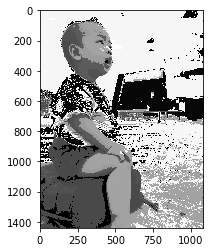

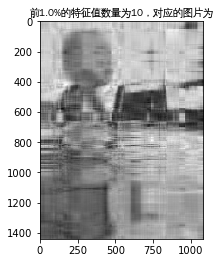

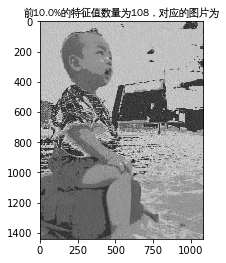

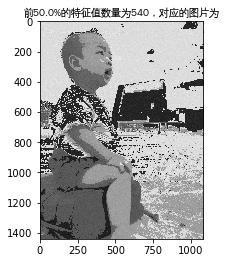

In [1]:
# 奇异值就是特征值
# 对于m*n矩阵，奇异值的数量为min(m,n)
# 奇异值数量计算方式为 百分比*min(m,n)，可以得到要获取的关键特征数量
# 根据本节课所学奇异值分解原理获取关键特征，再次reshape成图片

import matplotlib
import numpy as np
from matplotlib.font_manager import FontProperties
from scipy.linalg import svd
from PIL import Image
import matplotlib.pyplot as plt

# 取前k个特征，对图像进行还原
def get_image_feature(s, k,t):
	# 对于S，只保留前K个特征值
	s_temp = np.zeros(s.shape[0])
	s_temp[0:k] = s[0:k]
	s = s_temp * np.identity(s.shape[0])
	# 用新的s_temp，以及p,q重构A
	temp = np.dot(p,s)
	temp = np.dot(temp,q)
	plt.imshow(temp, cmap=plt.cm.gray, interpolation='nearest')
	myfont = FontProperties(fname='./code/image_svd/wqy-zenhei.ttc')
	# 解决负号'-'显示为方块的问题
	matplotlib.rcParams['axes.unicode_minus'] = False
	plt.title(u"前{}%的特征值数量为{}，对应的图片为".format(t*100, k), fontproperties=myfont)
	plt.show()


# 加载256色图片
image = Image.open('./code/image_svd/256.bmp')
width, height = image.size
A = np.array(image)
# 显示原图像
plt.imshow(A, cmap=plt.cm.gray, interpolation='nearest')
plt.show()
# 对图像矩阵A进行奇异值分解，得到p,s,q
p,s,q = svd(A, full_matrices=False)
# 取前k个特征，对图像进行还原
# 1%个特征值
k =int(min(width, height)*0.01)
get_image_feature(s, k,0.01)
# 10%个特征值
k =int(min(width, height)*0.1)
get_image_feature(s, k,0.1)
# 50%个特征值
k =int(min(width, height)*0.5)
get_image_feature(s, k,0.5)




## 使用Google Colab编辑器，对MovieLens数据集进行评分预测，计算RMSE（使用funkSVD, BiasSVD，SVD++）

In [44]:
from surprise import SVD
from surprise import Dataset
from surprise.model_selection import cross_validate
from surprise import Reader
from surprise import accuracy
from surprise.model_selection import KFold
import numpy as np
# 采用funksvd计算rmse
# 数据读取
reader = Reader(line_format='user item rating timestamp', sep=',', skip_lines=1)
data = Dataset.load_from_file('./code/MovieLens/ratings.csv', reader=reader)
train_set = data.build_full_trainset()

# 使用funkSVD
algo = SVD(biased=False)

# 定义K折交叉验证迭代器，K=3
resme=[]
kf = KFold(n_splits=3)
for trainset, testset in kf.split(data):
    # 训练并预测
    algo.fit(trainset)
    predictions = algo.test(testset)
    # 计算RMSE
    resme.append(accuracy.rmse(predictions, verbose=True))
print('使用funkSVD的KFold=3交叉验验证预测计算得到的resme={}'.format(np.mean(resme)))
    


RMSE: 0.8738
RMSE: 0.8722
RMSE: 0.8729
使用funkSVD的KFold=3交叉验验证预测计算得到的resme=0.8729777757736491


In [46]:
from surprise import SVD
from surprise import Dataset
from surprise.model_selection import cross_validate
from surprise import Reader
from surprise import accuracy
from surprise.model_selection import KFold
import numpy as np
# 采用funksvd计算rmse
# 数据读取
reader = Reader(line_format='user item rating timestamp', sep=',', skip_lines=1)
data = Dataset.load_from_file('./code/MovieLens/ratings.csv', reader=reader)
train_set = data.build_full_trainset()

# 使用BiasSVD
algo = SVD(biased=True)

# 定义K折交叉验证迭代器，K=3
resme=[]
kf = KFold(n_splits=3)
for trainset, testset in kf.split(data):
    # 训练并预测
    algo.fit(trainset)
    predictions = algo.test(testset)
    # 计算RMSE
    resme.append(accuracy.rmse(predictions, verbose=True))
print('使用BiasSVD的KFold=3交叉验验证预测计算得到的resme={}'.format(np.mean(resme))) 
    

RMSE: 0.8473
RMSE: 0.8439
RMSE: 0.8451
使用BiasSVD的KFold=3交叉验验证预测计算得到的resme=0.845396937755225


In [ ]:
from surprise import SVDpp
from surprise import Dataset
from surprise.model_selection import cross_validate
from surprise import Reader
from surprise import accuracy
from surprise.model_selection import KFold
import numpy as np
# 采用funksvd计算rmse
# 数据读取
reader = Reader(line_format='user item rating timestamp', sep=',', skip_lines=1)
data = Dataset.load_from_file('./code/MovieLens/ratings.csv', reader=reader)
train_set = data.build_full_trainset()

# 使用 SVD++
algo = SVDpp()

# 定义K折交叉验证迭代器，K=3
resme=[]
kf = KFold(n_splits=3)
for trainset, testset in kf.split(data):
    # 训练并预测
    algo.fit(trainset)
    predictions = algo.test(testset)
    # 计算RMSE
    resme.append(accuracy.rmse(predictions, verbose=True))
print('使用SVD++的KFold=3交叉验验证预测计算得到的resme={}'.format(np.mean(resme))) 

RMSE: 0.8285


svd++方式比较耗费内存和时间，计算rmse结果  biaseSVD 好于 funksvd

## 使用Gensim中的Word2Vec对三国演义进行Word Embedding，分析和曹操最相近的词有哪些，曹操+刘备-张飞=? 数据集：three_kingdoms.txt

In [15]:
# 加载jieba分词器件
#!pip install jieba
# 通过分词器将文本中的内容拆分词组，并且保存到 /code/word2vec/three_kingdoms/segment/文件夹下
import jieba
import os
def segment_lines(file_name, segment_out_dir, stopwords=[]):
    segment_out_name = os.path.join(segment_out_dir, 'segment.txt')
    with open(file_name, 'rb') as f:
        document = f.read()
        document_cut = jieba.cut(document)
        sentence_segment = []
        for word in document_cut:
            if word not in stopwords:
                sentence_segment.append(word)
        result = ' '.join(sentence_segment)
        result = result.encode('utf-8')
        with open(segment_out_name, 'wb') as f2:
            f2.write(result)

file_name = './code/word2vec/three_kingdoms/source/three_kingdoms.txt'
segment_folder = './code/word2vec/three_kingdoms/segment/'                
segment_lines(file_name, segment_folder)
        

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/wj/9s79jvtj43n1pz2cyk7bjvnm0000gn/T/jieba.cache
Loading model cost 0.471 seconds.
Prefix dict has been built successfully.


In [28]:
from gensim.models import word2vec
import multiprocessing

# 如果目录中有多个文件，可以使用PathLineSentences
segment_file = './code/word2vec/three_kingdoms/segment/' 
sentences = word2vec.PathLineSentences(segment_folder)

# 设置模型参数，进行训练
# window是句子中当前词和预测词之间的最大距离。window越大，则与中心词较远的词也会产生上下文关系
# sentences : 可迭代的对象, 可选的
# 需要分析的预料。可迭代的"sentences" 可以是tokens列表集中的一个简单列表，但是对于较大的语料库，请考虑直接从磁盘/网络中流式传输"sentences"的可迭代项。
#min_count : 整型, 最小词频，忽略所有总频率低于此频率的单词
model = word2vec.Word2Vec(sentences, size=100, window=3, min_count=1)
print('与曹操相似的词语')
print(model.wv.similar_by_word('曹操', topn =100))
print('曹操+刘备-张飞=')
print(model.wv.most_similar(positive=['曹操', '刘备'], negative=['张飞']))

与曹操相似的词语
[('慈', 0.9927194118499756), ('孙权', 0.9925665855407715), ('回报', 0.9924286603927612), ('前事', 0.9923129081726074), ('司马懿', 0.9919908046722412), ('已', 0.9917507171630859), ('臣愿', 0.991342306137085), ('毕', 0.9899942278862), ('忻然', 0.9899673461914062), ('玄德公', 0.9898799657821655), ('复来', 0.9897611737251282), ('家兄', 0.9890639781951904), ('不信', 0.9889959096908569), ('进', 0.9888558983802795), ('不知', 0.9888418316841125), ('周瑜', 0.988480269908905), ('鸯', 0.9884320497512817), ('决战', 0.9884213805198669), ('众官', 0.9883460998535156), ('大哭', 0.9881582260131836), ('孔明', 0.9880989789962769), ('贼', 0.9877803325653076), ('但', 0.9876866340637207), ('楙', 0.9876067638397217), ('亦', 0.9874866604804993), ('关公', 0.9872788190841675), ('请', 0.987005352973938), ('云长', 0.9869683980941772), ('欲', 0.9868084788322449), ('被困', 0.9867424368858337), ('汝兄', 0.9866575598716736), ('拍案', 0.9865502715110779), ('告免', 0.9865474104881287), ('痛哭', 0.9865207076072693), ('群臣', 0.9865204095840454), ('不至', 0.9865047335624695